In [6]:
from import_library import *
import seaborn as sb
from scipy.optimize import minimize

In [7]:
data_path = 'data/'

# Data Injection 

In [8]:
def read_file_csv(file):
    '''   
    Read csv file 
    ----------
    Attributes:
    file: file
    ----------
    Example:
    ocb_file = 'OCB Historical Data.csv'
    ocb_data = read_file_csv(ocb_file)
    '''   
    data = pd.read_csv(data_path +file, sep=',',header = 0)
    return data

In [9]:
ocb_file = 'OCB Historical Data.csv'
ocb_data = read_file_csv(ocb_file)
ocb_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/24/2023,"13,550.00","13,600.00","13,600.00","13,150.00",2.42M,-0.73%
1,11/23/2023,"13,650.00","13,750.00","13,900.00","13,550.00",2.75M,-0.73%
2,11/22/2023,"13,750.00","13,750.00","13,850.00","13,650.00",1.98M,-0.36%
3,11/21/2023,"13,800.00","13,750.00","13,850.00","13,650.00",1.80M,0.73%
4,11/20/2023,"13,700.00","13,050.00","13,800.00","13,050.00",1.88M,-0.72%


In [10]:
khp_file = 'KHP Historical Data.csv'
khp_data = read_file_csv(khp_file)
khp_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/24/2023,"9,240.0","9,000.0","9,240.0","9,000.0",17.10K,0.11%
1,11/23/2023,"9,230.0","9,160.0","9,400.0","9,150.0",47.90K,0.00%
2,11/22/2023,"9,230.0","9,150.0","9,230.0","9,050.0",16.00K,-0.22%
3,11/21/2023,"9,250.0","9,160.0","9,250.0","9,150.0",41.90K,0.00%
4,11/20/2023,"9,250.0","8,830.0","9,350.0","8,830.0",25.40K,-1.07%


In [11]:
bmi_file = 'BMI Historical Data.csv'
bmi_data = read_file_csv(bmi_file)
bmi_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/24/2023,"21,350.0","21,300.0","21,350.0","20,900.0",57.60K,1.18%
1,11/23/2023,"21,100.0","21,600.0","21,700.0","21,000.0",183.40K,-1.86%
2,11/22/2023,"21,500.0","21,500.0","21,650.0","21,250.0",88.20K,0.00%
3,11/21/2023,"21,500.0","21,200.0","21,600.0","21,050.0",193.90K,1.42%
4,11/20/2023,"21,200.0","20,800.0","21,250.0","20,800.0",186.00K,-1.40%


In [12]:
# Combine all data 
data = ocb_data.merge(khp_data, on='Date')
data = data.merge(bmi_data, on='Date')
# Rename features of data
columns = {
    "Price_x":"OCB",
    "Change %_x": "OCB_pct",
    "Price_y": "KHP",
    "Change %_y":"KHP_pct",
    "Price": "BMI",
    "Change %":"BMI_pct",
}
selected_columns = ['Date','OCB','OCB_pct','KHP','KHP_pct','BMI','BMI_pct']
data.rename(columns=columns,inplace=True)
data = data[selected_columns]

# Data Preprocessing

In [13]:
# Convert data types of prices of OCB-KHP-BMI from object to float
def TransformCommaToColons(input):
    '''    
    Convert objects value to float ones , using in DataFrame transformation
    ----------
    Attributes:
    input: input data
    ----------
    Example:
    data['OCB'] = data['OCB'].apply(TransformCommaToColons)
    '''    
    return float(input.replace(',',''))/1000
    
data['OCB'] = data['OCB'].apply(TransformCommaToColons)
data['KHP'] = data['KHP'].apply(TransformCommaToColons)
data['BMI'] = data['BMI'].apply(TransformCommaToColons)

In [14]:
# Convert column "Date" to OCB
data['Date'] = pd.to_datetime(data['Date'],format='%m/%d/%Y')
data = data.sort_values(by='Date', ascending=True).reset_index(drop=True)

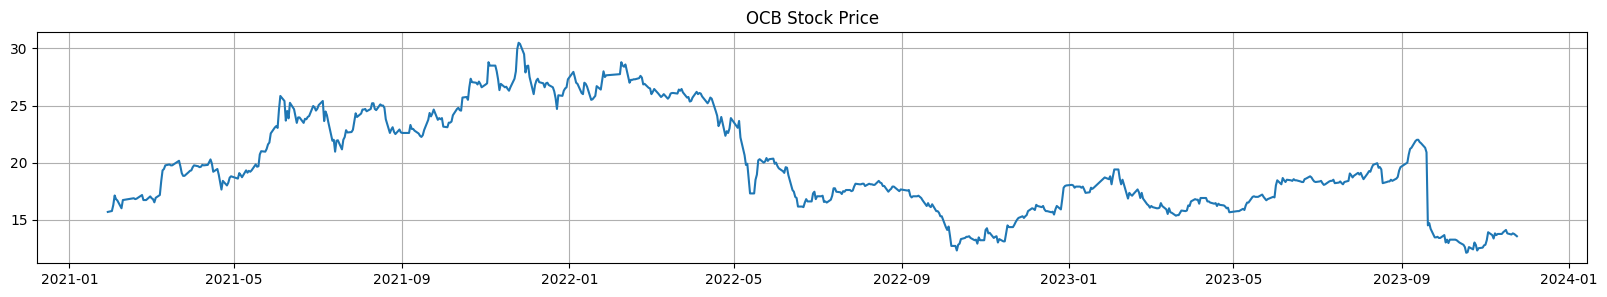

In [15]:
#data 633 x 4
plt.figure(figsize=(20,3))
plt.plot(data['Date'],data['OCB'])
plt.title('OCB Stock Price')
plt.grid()
#_ = plt.xticks(df.index.values, df['Month'], rotation=60)
plt.show()

In [16]:
def convert_percentage_object_2_float(input):
    '''    
    Convert objects value to float ones , using in DataFrame transformation
    ----------
    Attributes:
    input: input data
    ----------
    Example:
    data['OCB_pct'] = data['OCB_pct'].apply(TransformCommaToColons)
    '''    
    return float(input.replace('%',''))

In [17]:
data['OCB_pct'] = data['OCB_pct'].apply(convert_percentage_object_2_float)
data['KHP_pct'] = data['KHP_pct'].apply(convert_percentage_object_2_float)
data['BMI_pct'] = data['BMI_pct'].apply(convert_percentage_object_2_float)

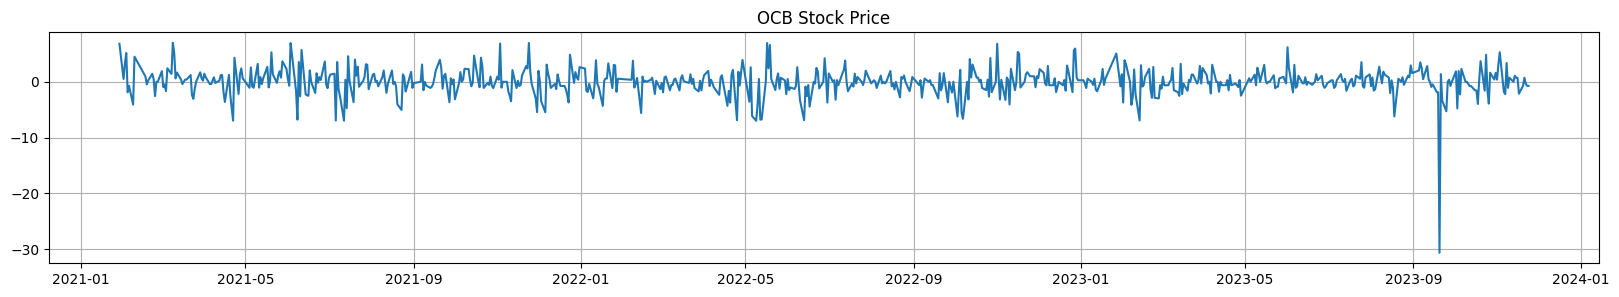

In [18]:
#data 633 x 4 # Note : 20/09/2023 : Dividence (-30%) - split share
plt.figure(figsize=(20,3))
plt.plot(data['Date'],data['OCB_pct'])
plt.title('OCB Stock Price')
plt.grid()
#_ = plt.xticks(df.index.values, df['Month'], rotation=60)
plt.show()

In [19]:
data

,Date,OCB,OCB_pct,KHP,KHP_pct,BMI,BMI_pct
0,2021-01-29,15.68,6.81,6.54,3.20,18.92,3.49
1,2021-02-01,15.76,0.51,6.44,-1.55,17.72,-6.35
2,2021-02-02,16.28,3.30,6.51,1.15,18.17,2.54
3,2021-02-03,17.12,5.16,6.51,0.00,19.00,4.55
4,2021-02-04,16.80,-1.87,6.50,-0.14,19.03,0.20
...,...,...,...,...,...,...,...
699,2023-11-20,13.70,-0.72,9.25,-1.07,21.20,-1.40
700,2023-11-21,13.80,0.73,9.25,0.00,21.50,1.42
701,2023-11-22,13.75,-0.36,9.23,-0.22,21.50,0.00
702,2023-11-23,13.65,-0.73,9.23,0.00,21.10,-1.86


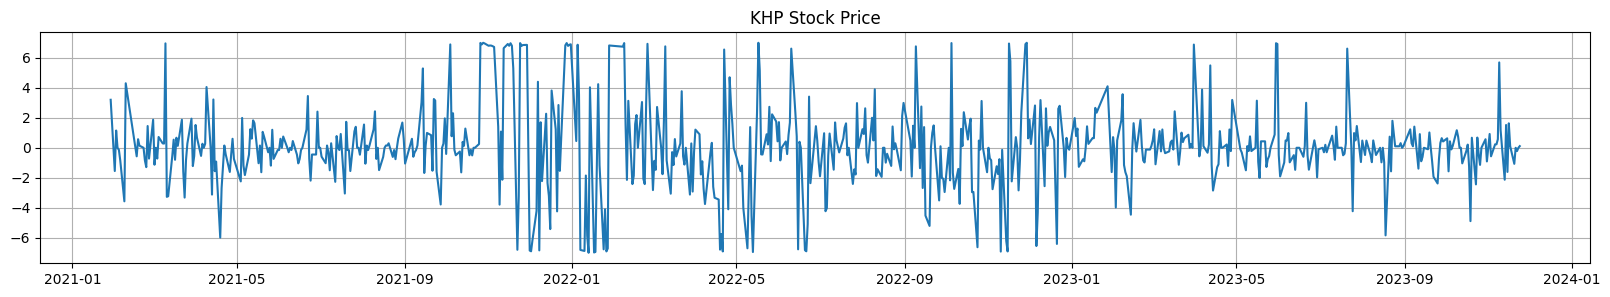

In [20]:
# Why KHP change dramatically --> 20/9 - down -30%
plt.figure(figsize=(20,3))
plt.plot(data['Date'],data['KHP_pct'])
plt.title('KHP Stock Price')
plt.grid()
#_ = plt.xticks(df.index.values, df['Month'], rotation=60)
plt.show()

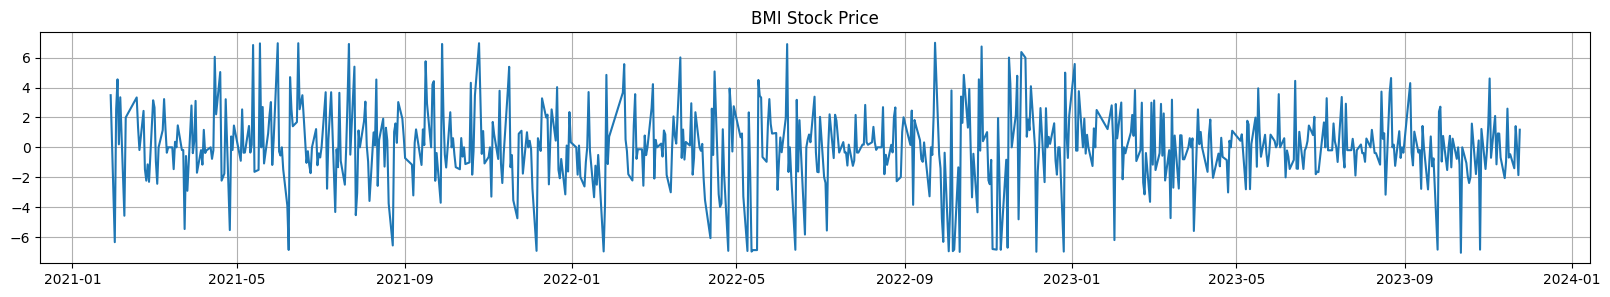

In [21]:
# % changed - must be in (-7 to +7)
plt.figure(figsize=(20,3))
plt.plot(data['Date'],data['BMI_pct'])
plt.title('BMI Stock Price')
plt.grid()
#_ = plt.xticks(df.index.values, df['Month'], rotation=60)
plt.show()

In [22]:
data

,Date,OCB,OCB_pct,KHP,KHP_pct,BMI,BMI_pct
0,2021-01-29,15.68,6.81,6.54,3.20,18.92,3.49
1,2021-02-01,15.76,0.51,6.44,-1.55,17.72,-6.35
2,2021-02-02,16.28,3.30,6.51,1.15,18.17,2.54
3,2021-02-03,17.12,5.16,6.51,0.00,19.00,4.55
4,2021-02-04,16.80,-1.87,6.50,-0.14,19.03,0.20
...,...,...,...,...,...,...,...
699,2023-11-20,13.70,-0.72,9.25,-1.07,21.20,-1.40
700,2023-11-21,13.80,0.73,9.25,0.00,21.50,1.42
701,2023-11-22,13.75,-0.36,9.23,-0.22,21.50,0.00
702,2023-11-23,13.65,-0.73,9.23,0.00,21.10,-1.86


# Correlation Analysis

In [23]:
def correlation_matrix(df,features,title=None,save=False):
    '''    
    Plot Correlation Matrix
    ----------
    Attributes:
    df : pd.DataFrame                
    features: list
        list of features of the df_dataset
    title: str, default: None
        The name of saved file
    save: bool, default: False
        save or not
    ----------
    Example:
    CorrelationMatrix(df_smoothed_scaled_filterd_dataset,orderedFeatured,title=None,save=False)
    '''    
    plt.close('all')
    train = df[features]
    plt.figure(figsize=(15, 15))
    dataplot = sb.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns,  cmap="YlGnBu", annot=True)
    if title == None:
        title = 'corr.png'    
    if save:
        if not os.path.exists(f'{savePath}/'):
            os.makedirs( f'{savePath}/')  
        plt.savefig(f'{savePath}/{title}', bbox_inches="tight")    
    plt.show()

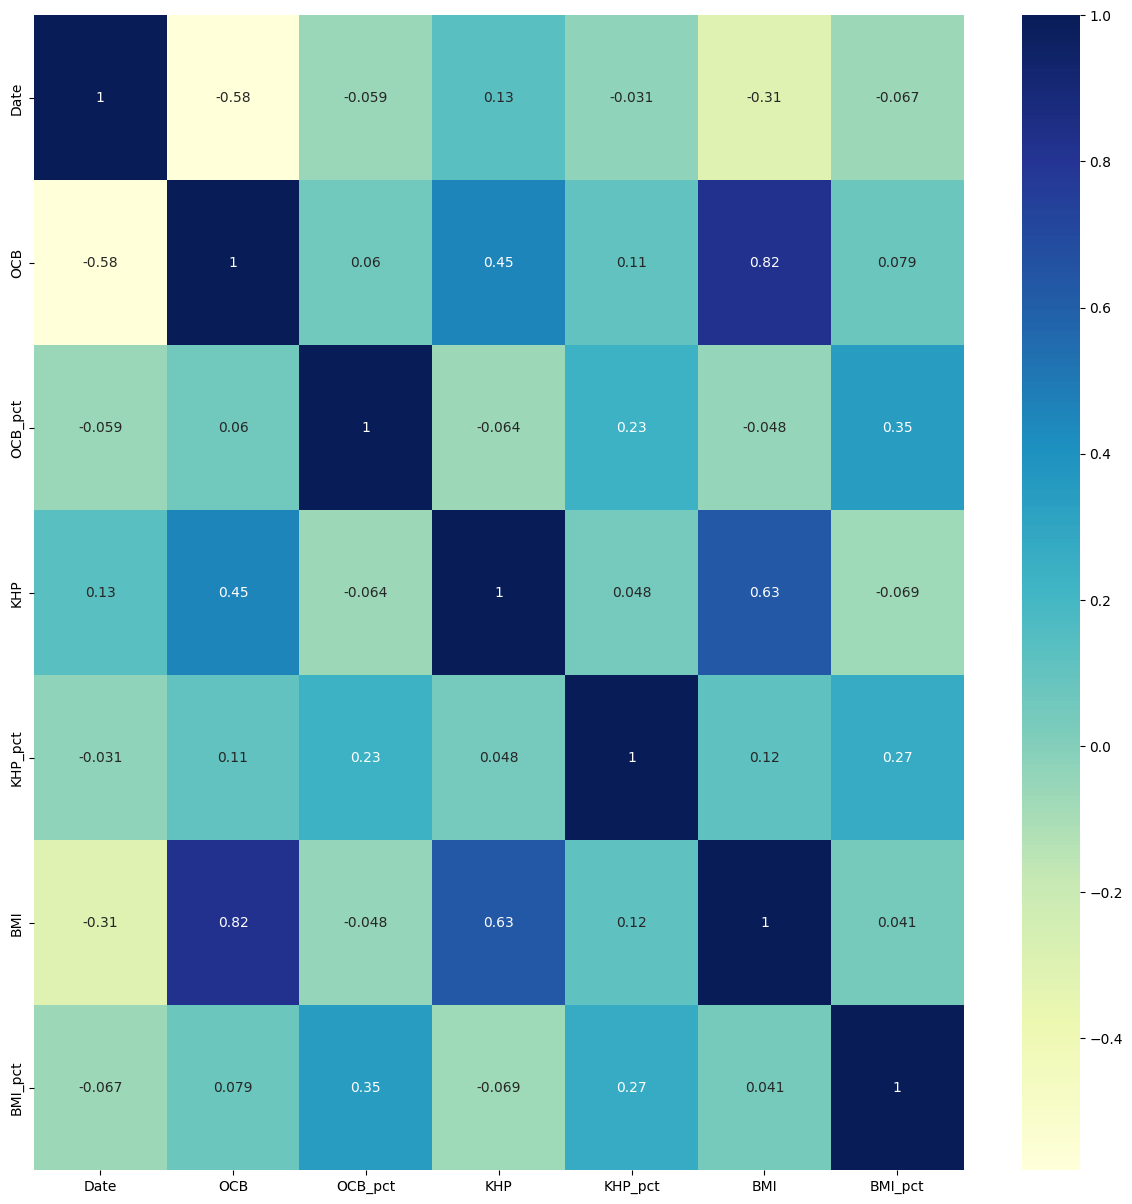

In [24]:
correlation_matrix(data,selected_columns) 
# Date and OCB (-0.58)
# OCB and BMM (0.82) 
# KHP and OCB (0.45)
# KHP and BMI (0.63)


# Mean_Variance_Optimization

In [25]:
ocb_data['ticker'] ='OCB'
khp_data['ticker'] ='KHP'
bmi_data['ticker'] ='BMI'
df = pd.concat([ocb_data,khp_data,bmi_data])
df.rename(columns = {"Change %":"returns"},inplace=True)
df= df.sort_values(by='Date', ascending=True).reset_index(drop=True)
df

,Date,Price,Open,High,Low,Vol.,returns,ticker
0,01/03/2023,"22,700.0","21,150.0","22,750.0","21,150.0",710.00K,5.58%,BMI
1,01/03/2023,"18,050.00","17,500.00","18,100.00","17,500.00",1.42M,0.28%,OCB
2,01/03/2023,"7,274.3","7,133.3","7,283.7","6,813.8",49.90K,1.98%,KHP
3,01/04/2022,"41,606.0","41,224.0","41,606.0","40,986.0",413.80K,0.00%,BMI
4,01/04/2022,"20,368.6","21,407.4","21,542.9","19,646.0",1.99M,0.45%,KHP
...,...,...,...,...,...,...,...,...
2107,12/30/2022,"21,500.0","20,650.0","21,500.0","20,400.0",259.00K,2.14%,BMI
2108,12/30/2022,"18,000.00","17,800.00","18,000.00","17,500.00",2.27M,0.28%,OCB
2109,12/31/2021,"20,278.3","20,278.3","20,278.3","19,058.9",3.39M,6.90%,KHP
2110,12/31/2021,"27,300.00","26,800.00","28,000.00","26,800.00",6.45M,2.63%,OCB


In [26]:
def convert_percentage_object_2_float(input):
    '''    
    Convert objects value to float ones , using in DataFrame transformation
    ----------
    Attributes:
    input: input data
    ----------
    Example:
    data['OCB_pct'] = data['OCB_pct'].apply(TransformCommaToColons)
    '''    
    return float(input.replace('%',''))

def price_datatype_transformation(input):
    return float(input.replace(',',''))/1000

# Data Preprocessing
df['returns'] = df['returns'].apply(convert_percentage_object_2_float)
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y')
df['Price'] = df['Price'].apply(price_datatype_transformation)
df = df[['Date','Price','returns','ticker']]
# Calculate cummulative_returns - by summing up pct of each stocks
df['cumulative_returns'] = df.groupby('ticker')['returns'].cumsum()


In [27]:
df

,Date,Price,returns,ticker,cumulative_returns
0,2023-01-03,22.70,5.58,BMI,5.58
1,2023-01-03,18.05,0.28,OCB,0.28
2,2023-01-03,7.27,1.98,KHP,1.98
3,2022-01-04,41.61,0.00,BMI,5.58
4,2022-01-04,20.37,0.45,KHP,2.43
...,...,...,...,...,...
2107,2022-12-30,21.50,2.14,BMI,38.83
2108,2022-12-30,18.00,0.28,OCB,12.76
2109,2021-12-31,20.28,6.90,KHP,63.88
2110,2021-12-31,27.30,2.63,OCB,15.39


In [28]:
# Parameters 
window = 14 # Time periode for computing optimization (2-weeks)
delta = df.groupby('ticker')['returns'].diff()# Calculate the difference

# The average gain and loss in 14 days 
gain = delta.where(delta > 0, 0) # if delta > 0 - keep - else 0
loss = -delta.where(delta < 0, 0) # if delta < 0 - keep - else 0
average_gain = gain.rolling(window).mean().reset_index(0, drop=True)
average_loss = loss.rolling(window).mean().reset_index(0, drop=True)
# RSI - ratio bewenn average gain and loss 
rs = average_gain / average_loss
df['rsi'] = 100 - (100 / (1 + rs))
df['rsi'] = df.groupby('ticker')['rsi'].fillna(df['rsi'].mean())

In [29]:
# Rate of return - expected return percent in 10 days (Ex: day_10 - day_1 / day_1)
# > 0 - gain - up trennd 
# < 0 - loss down_train
lookback_period = 10
df['price_momentum'] = df.groupby('ticker')['Price'].pct_change(lookback_period)
df['price_momentum'] = df.groupby('ticker')['price_momentum'].fillna(df['price_momentum'].mean())
df

,Date,Price,returns,ticker,cumulative_returns,rsi,price_momentum
0,2023-01-03,22.70,5.58,BMI,5.58,49.84,0.07
1,2023-01-03,18.05,0.28,OCB,0.28,49.84,0.07
2,2023-01-03,7.27,1.98,KHP,1.98,49.84,0.07
3,2022-01-04,41.61,0.00,BMI,5.58,49.84,0.07
4,2022-01-04,20.37,0.45,KHP,2.43,49.84,0.07
...,...,...,...,...,...,...,...
2107,2022-12-30,21.50,2.14,BMI,38.83,43.63,0.00
2108,2022-12-30,18.00,0.28,OCB,12.76,49.74,0.11
2109,2021-12-31,20.28,6.90,KHP,63.88,52.74,0.39
2110,2021-12-31,27.30,2.63,OCB,15.39,54.21,0.05


In [30]:
# Calculate earnings_growth, revenue_growth, and pe_ratio
df['earnings_growth'] = df.groupby('ticker')['returns'].pct_change()
df['revenue_growth'] = df.groupby('ticker')['returns'].pct_change()
df['pe_ratio'] = df['Price'] / df['returns']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['earnings_growth'] = df.groupby('ticker')['earnings_growth'].fillna(df['earnings_growth'].mean())
df['revenue_growth'] = df.groupby('ticker')['revenue_growth'].fillna(df['revenue_growth'].mean())
df['pe_ratio'] = df.groupby('ticker')['pe_ratio'].fillna(df['pe_ratio'].mean())

# The volatitlity in time-of-interest trading days -30days (by std of returns - rate of return)
# The higher volativity the more fluctuating the returns is 
# Volatility is the risk level, defined as the standard diviation of return
df['rolling_volatility'] = df.groupby('ticker')['returns'].rolling(window=30, min_periods=1).std().reset_index(0, drop=True)
df['rolling_volatility'] = df.groupby('ticker')['rolling_volatility'].fillna(df['rolling_volatility'].mean())
df

,Date,Price,returns,ticker,cumulative_returns,rsi,price_momentum,earnings_growth,revenue_growth,pe_ratio,rolling_volatility
0,2023-01-03,22.70,5.58,BMI,5.58,49.84,0.07,-0.92,-0.92,4.07,2.45
1,2023-01-03,18.05,0.28,OCB,0.28,49.84,0.07,-0.92,-0.92,64.46,2.45
2,2023-01-03,7.27,1.98,KHP,1.98,49.84,0.07,-0.92,-0.92,3.67,2.45
3,2022-01-04,41.61,0.00,BMI,5.58,49.84,0.07,-1.00,-1.00,-0.03,3.95
4,2022-01-04,20.37,0.45,KHP,2.43,49.84,0.07,-0.77,-0.77,45.26,1.08
...,...,...,...,...,...,...,...,...,...,...,...
2107,2022-12-30,21.50,2.14,BMI,38.83,43.63,0.00,-0.09,-0.09,10.05,2.44
2108,2022-12-30,18.00,0.28,OCB,12.76,49.74,0.11,-0.26,-0.26,64.29,2.22
2109,2021-12-31,20.28,6.90,KHP,63.88,52.74,0.39,-54.08,-54.08,2.94,3.69
2110,2021-12-31,27.30,2.63,OCB,15.39,54.21,0.05,8.39,8.39,10.38,2.25


In [31]:
# Equal weighting
num_assets = len(df['ticker'].unique())
weights = pd.Series(1/num_assets, index=df['ticker'].unique())
# mean-variance optimization approach - Covariance between each stocks based on its returns
covariance_matrix = df.pivot_table(index='Date', columns='ticker', values='returns', aggfunc=np.mean).cov()
expected_returns = df.groupby('ticker')['returns'].mean()
# Number of assets
n_assets = len(expected_returns)

In [35]:
expected_returns

ticker
BMI   0.06
KHP   0.09
OCB   0.02
Name: returns, dtype: float64

In [50]:
import cvxpy as cp
# Define the optimization variables - Quadratic optimization program in Python
weights = cp.Variable(n_assets) # 1x3 - 3x3 --> quad_form(1x3 ,3x3)
target_return = cp.Parameter() 

# Define constraints
constraints = [
    cp.sum(weights) == 1, # Sum of weight =  1
    weights >= 0, # the value of weights >0
    weights <=1,
    np.array(expected_returns) @ weights >= 0.06,
]

# Define the portfolio risk -- for solving the LQR problems
# -> function (weight@covariance_matrix)* I(n_assets) * weight@covariance_matrix)^T
# the function: the second order of varible weights with subject to the covariance_matrix
# Finding the minimize the second order based on the covarience between each stocks
portfolio_risk = cp.quad_form(weights @ covariance_matrix.values, np.eye(n_assets))

# Define the objective (minimize portfolio risk)
objective = cp.Minimize(portfolio_risk)
# Define the problem
problem = cp.Problem(objective, constraints)
# Solve the problem
problem.solve()

# Get the optimal weights
optimal_weights = weights.value

stocks = df['ticker'].unique()
print("Optimal Weights:")
for i, weight in enumerate(optimal_weights):
    print(f"{stocks[i]}: {weight:.2f}")

Optimal Weights:
BMI: 0.30
OCB: 0.41
KHP: 0.29


In [44]:
expected_returns

ticker
BMI   0.06
KHP   0.09
OCB   0.02
Name: returns, dtype: float64

# Sharpe Ratio Optimization

In [34]:
# Sharpe ratio is risk efficiency; it assesses the return of an investment compared to its risk.

In [57]:
# See more in https://github.com/PaiViji/PythonFinance-PortfolioOptimization/tree/master/Lesson6_SharpeRatioOptimization
risk_free_rate = 0.008 # why here
# Parameter
covariance_matrix = df.pivot_table(index='Date', columns='ticker', values='returns', aggfunc=np.mean).cov()
expected_returns = df.groupby('ticker')['returns'].mean()

def negative_sharpe_ratio(weights):
    # Dot product between weights and expected_returns 
    portfolio_return = np.dot(weights, expected_returns) 
    portfolio_variance = np.dot(weights, np.dot(covariance_matrix, weights))
    sharpe_ratio = (portfolio_return - risk_free_rate) / np.sqrt(portfolio_variance)
    return -sharpe_ratio

# Define the equality constraint
constraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
# Define the bounds on the variables - set the boundary of weights
bounds = [(0, 1) for _ in range(n_assets)]
# Set an initial guess for the weights (equal weights)
initial_weights = np.ones(n_assets) / n_assets

# Use the SLSQP optimization algorithm to find the optimal weights
# Minimize the negative sharpe ratio for (lowing the risk )
result = minimize(negative_sharpe_ratio, initial_weights, method='SLSQP', constraints=constraint, bounds=bounds)
optimal_weights = result.x

stocks = df['ticker'].unique()
print("Optimal Weights:")
for i, weight in enumerate(optimal_weights):
    print(f"{stocks[i]}: {weight:.2f}")

Optimal Weights:
BMI: 0.30
OCB: 0.70
KHP: 0.00


# Markowitz's Efficient Frontier with contrained optimization method in Python

In [82]:
df2 = pd.DataFrame([ocb_data['Change %'], khp_data['Change %'],bmi_data['Change %']],
                  index = ['OCB','KHP','BMI'],
                  )
df2 = df2.T

In [84]:
def convert_percentage_object_2_float(input):
    '''    
    Convert objects value to float ones , using in DataFrame transformation
    ----------
    Attributes:
    input: input data
    ----------
    Example:
    data['OCB_pct'] = data['OCB_pct'].apply(TransformCommaToColons)
    '''    
    return float(input.replace('%',''))
df2['OCB'] = df2['OCB'].apply(convert_percentage_object_2_float)
df2['KHP'] = df2['KHP'].apply(convert_percentage_object_2_float)
df2['BMI'] = df2['BMI'].apply(convert_percentage_object_2_float)

In [95]:
'''
# #Calculate daily changes in the stocks' value
# df2 = df.pct_change()
#Remove nan values at the first row of df2. Create a new dataframe df
df_new=df2.iloc[1:len(df2.index),:]
'''
# Calculate annualized average return for each stock. 
# Annualized average return = Daily average return * 252 business days.
r = np.mean(df2,axis=0)*252

# Create a covariance matrix
covar = df2.cov()

In [96]:
def ret(r,w):
    '''
    Return 
    '''
    return r.dot(w)
# Risk level - or volatility
def vol(w,covar):
    '''
    Risk level based on the definition std
    '''
    return np.sqrt(np.dot(w,np.dot(w,covar)))
def sharpe (ret,vol):
    '''
    Return / volativity
    '''
    return ret/vol

In [99]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint, Bounds

num_assets = df2.shape[1]

# All weights must be between 0 and 1, so set 0 and 1 as the boundaries.
bounds = Bounds(0, 1)

# Set the constraint that the sum of weights equals 1.
constraint_matrix = np.ones((1, num_assets))
linear_constraint = LinearConstraint(constraint_matrix, [1], [1])

# Find a portfolio with the minimum risk.
# Create x0, the first guess at the values of each stock's weight.
initial_weights = np.ones(num_assets) / num_assets

# Define a function to calculate portfolio volatility (risk)
def portfolio_volatility(weights):
    # risk porforlion --> minimize the standard deviation
    return np.sqrt(np.dot(weights, np.dot(weights, covar)))

# TheTrust-Region Constrained Algorithm (method=’trust-constr’) 
# since it is suitable for multivariate scalar functions.
# Minimize the risk function using the 'trust-constr' method with linear constraint and bounds.
res = minimize(portfolio_volatility, initial_weights, method='trust-constr', constraints=linear_constraint, bounds=bounds)

# These are the weights of the stocks in the portfolio with the lowest level of risk possible.
w_min = res.x

# Set print options to show weights and risk with 2 decimal places
np.set_printoptions(suppress=True, precision=2)

# Print the optimal weights and corresponding return and risk
print("Optimal Weights:")

stocks = df2.columns.tolist()
for i, weight in enumerate(w_min):
    print(f"{stocks[i]}: {weight:.2f}")
    
#print(w_min)
print("Return: %.2f%%" % (ret(r, w_min) * 100), "Risk: %.3f" % portfolio_volatility(w_min))

Optimal Weights:
OCB: 0.37
KHP: 0.32
BMI: 0.31
Return: 1367.48% Risk: 1.881


In [105]:
# Create x0, the first guess at the values of each stock's weight.
initial_weights = np.ones(num_assets) / num_assets

# Define the function to calculate the Sharpe ratio (1/volatility)
def sharpe_ratio(weights):
    # Function return / volatility -> 1 / sharpe
    portfolio_volatility = np.sqrt(np.dot(weights, np.dot(weights, covar)))
    portfolio_return = np.dot(r, weights)
    return -portfolio_return / portfolio_volatility  # negative value for minimization

# Minimize the negative Sharpe ratio (to maximize Sharpe ratio) using 'trust-constr' method with constraints and bounds.
res_sharpe = minimize(sharpe_ratio, initial_weights, method='trust-constr', constraints=linear_constraint, bounds=bounds)

# These are the weights of the stocks in the portfolio with the highest Sharpe ratio.
w_sharpe = res_sharpe.x

# Set print options to show weights, return, and risk with 2 decimal places
np.set_printoptions(suppress=True, precision=2)

# Print the optimal weights and corresponding return and risk
stocks = df2.columns.tolist()
for i, weight in enumerate(w_sharpe):
    print(f"{stocks[i]}: {weight:.2f}")
    
print("Return: %.2f%%" % (np.dot(r, w_sharpe) * 100), "Risk: %.3f" % np.sqrt(np.dot(w_sharpe, np.dot(w_sharpe, covar))))

OCB: 0.00
KHP: 0.67
BMI: 0.33
Return: 1998.84% Risk: 2.222


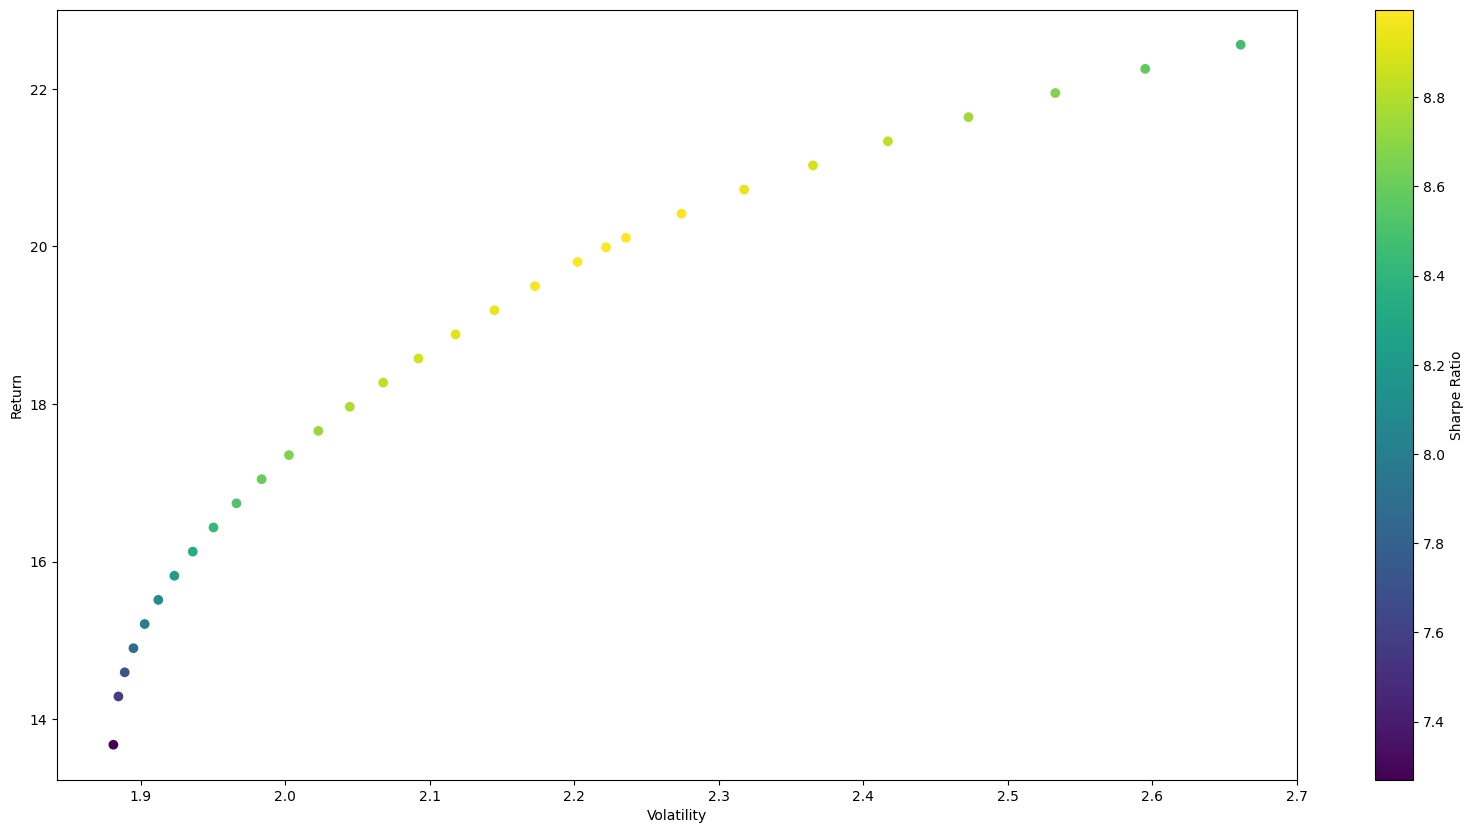

In [108]:
### The end is showing the relationship between the return and volatility

num_ports = 30 
# Initialize an array to store all the portfolio weights
all_weights = np.zeros((num_ports, num_assets))

# Calculate the gap between portfolio returns for equally spaced portfolios
gap = (np.amax(r) - ret(r, w_min)) / num_ports

# Assign the first two portfolios to w_min and w_sharpe
all_weights[0], all_weights[1] = w_min, w_sharpe

# Initialize arrays to store portfolio returns and volatilities
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)

# Calculate returns and volatilities for w_min and w_sharpe
ret_arr[0], ret_arr[1] = ret(r, w_min), ret(r, w_sharpe)
vol_arr[0], vol_arr[1] = vol(w_min, covar), vol(w_sharpe, covar)

# Loop through to generate remaining portfolios with increasing returns
for i in range(2, num_ports):
    port_ret = ret(r, w_min) + i * gap
    double_constraint = LinearConstraint([np.ones(num_assets), r], [1, port_ret], [1, port_ret])
    
    # Create x0: initial guess for weights.
    x0 = w_min
    
    # Define a function for portfolio volatility
    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights, np.dot(weights, covar)))
    
    # Optimize portfolio weights to achieve the target return
    res = minimize(portfolio_volatility, x0, method='trust-constr', constraints=double_constraint, bounds=bounds)
    
    all_weights[i, :] = res.x
    ret_arr[i] = port_ret
    vol_arr[i] = portfolio_volatility(res.x)

# Calculate Sharpe ratios for each portfolio
sharpe_arr = ret_arr / vol_arr

# Plotting the Efficient Frontier
plt.figure(figsize=(20, 10))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [178]:
result_lists = []
for idx,(x,y,z) in enumerate(zip(all_weights,vol_arr,ret_arr)):
    result_list = [np.round(all_weights[idx],2),vol_arr[idx],ret_arr[idx]]
    result_lists.append(result_list)
result = pd.DataFrame(result_lists,columns= ['weights[OCB,KHP,BMI]','volativity','return'])

In [179]:
result

,"weights[OCB,KHP,BMI]",volativity,return
0,"[0.37, 0.32, 0.31]",1.88,13.67
1,"[0.0, 0.67, 0.33]",2.22,19.99
2,"[0.33, 0.35, 0.32]",1.88,14.29
3,"[0.31, 0.37, 0.32]",1.89,14.59
4,"[0.29, 0.38, 0.32]",1.89,14.90
5,"[0.28, 0.4, 0.33]",1.90,15.21
6,"[0.26, 0.42, 0.33]",1.91,15.51
7,"[0.24, 0.43, 0.33]",1.92,15.82
8,"[0.22, 0.45, 0.33]",1.94,16.13
9,"[0.2, 0.47, 0.33]",1.95,16.43
